In [1]:
import pandas as pd
import os

# Lista para guardar cada DataFrame
dataframes = []

# Recorre todos los archivos en el directorio actual
for filename in os.listdir():
    if filename.endswith('.csv'):
        # Lee el archivo CSV, seleccionando solo las columnas deseadas
        df = pd.read_csv(filename, usecols=[1, 2, 3])
        dataframes.append(df)

# En este punto, la lista 'dataframes' contiene un DataFrame por cada archivo CSV encontrado


In [2]:
import pandas as pd
import os

# Intenta encontrar y leer el primer archivo CSV
for filename in os.listdir():
    if filename.endswith('.csv'):
        # Lee el archivo CSV, seleccionando solo las columnas deseadas
        df = pd.read_csv(filename, usecols=[1, 2, 3])
        print(f"DataFrame from {filename}:")
        print(df)
        break  # Detiene el bucle después de leer el primer archivo CSV


DataFrame from df_final_PC14_k3.csv:
   ResolvedValue  Frecuencia  Significativo
0              1         368            336
1              2         419            412
2              3         844            834


In [3]:
import pandas as pd
import os

# Intenta encontrar y leer el primer archivo CSV
for filename in os.listdir():
    if filename.endswith('.csv'):
        # Lee el archivo CSV, asegurándote de incluir la columna 'Frecuencia'
        # Asegúrate de que el índice de la columna 'Frecuencia' está correctamente incluido
        df = pd.read_csv(filename)
        break  # Detiene el bucle después de leer el primer archivo CSV

# Asume que 'Frecuencia' es una de las columnas cargadas, ajusta según el índice correcto si es necesario
if 'Frecuencia' in df.columns:
    max_value = df['Frecuencia'].max()  # Encuentra el máximo valor en la columna 'Frecuencia'
    df['Frecuencia_Normalizada'] = df['Frecuencia'] / max_value  # Crea la nueva columna normalizada

    print(f"DataFrame from {filename} with normalized frequency:")
    print(df)
else:
    print("La columna 'Frecuencia' no se encuentra en el DataFrame.")


DataFrame from df_final_PC14_k3.csv with normalized frequency:
   Unnamed: 0  ResolvedValue  Frecuencia  Significativo  Porcentaje  \
0           1              1         368            336   91.304348   
1           2              2         419            412   98.329356   
2           3              3         844            834   98.815166   

   Frecuencia_Normalizada  
0                0.436019  
1                0.496445  
2                1.000000  


In [4]:
import pandas as pd
import os

# Lista para guardar la suma de frecuencias normalizadas y los nombres de los archivos
sum_frequencies = []
filenames = []

# Recorre todos los archivos en el directorio actual
for filename in os.listdir():
    if filename.endswith('.csv'):
        # Lee el archivo CSV, asegurándote de incluir la columna 'Frecuencia'
        # Asegúrate de que el índice de la columna 'Frecuencia' está correctamente incluido
        df = pd.read_csv(filename)
        
        if 'Frecuencia' in df.columns:
            max_value = df['Significativo'].max()  # Encuentra el máximo valor en la columna 'Frecuencia'
            df['Frecuencia_Normalizada'] = df['Significativo'] / max_value  # Crea la nueva columna normalizada
            
            # Calcula la suma de la columna normalizada y guarda el resultado con el nombre del archivo
            total_normalized_frequency = df['Frecuencia_Normalizada'].sum()
            sum_frequencies.append(total_normalized_frequency)
            filenames.append(filename)
        else:
            print(f"La columna 'Frecuencia' no se encuentra en {filename}")

# Crea un DataFrame con los resultados
result_df = pd.DataFrame({
    'Filename': filenames,
    'Sum_Normalized_Frequency': sum_frequencies
})

print("DataFrame with filenames and sum of normalized frequencies:")
print(result_df)


DataFrame with filenames and sum of normalized frequencies:
                Filename  Sum_Normalized_Frequency
0   df_final_PC14_k3.csv                  1.896882
1   df_final_PC14_k4.csv                  2.350376
2   df_final_PC14_k5.csv                  2.839286
3   df_final_PC14_k6.csv                  2.206388
4   df_final_PC21_k3.csv                  1.810685
5   df_final_PC21_k4.csv                  2.174894
6   df_final_PC21_k5.csv                  1.959698
7   df_final_PC21_k6.csv                  1.745020
8    df_final_PC3_k3.csv                  2.022300
9    df_final_PC3_k4.csv                  3.125000
10   df_final_PC3_k5.csv                  2.096000
11   df_final_PC3_k6.csv                  2.237113
12   df_final_PC8_k3.csv                  2.100376
13   df_final_PC8_k4.csv                  2.755034
14   df_final_PC8_k5.csv                  1.975000
15   df_final_PC8_k6.csv                  1.000000


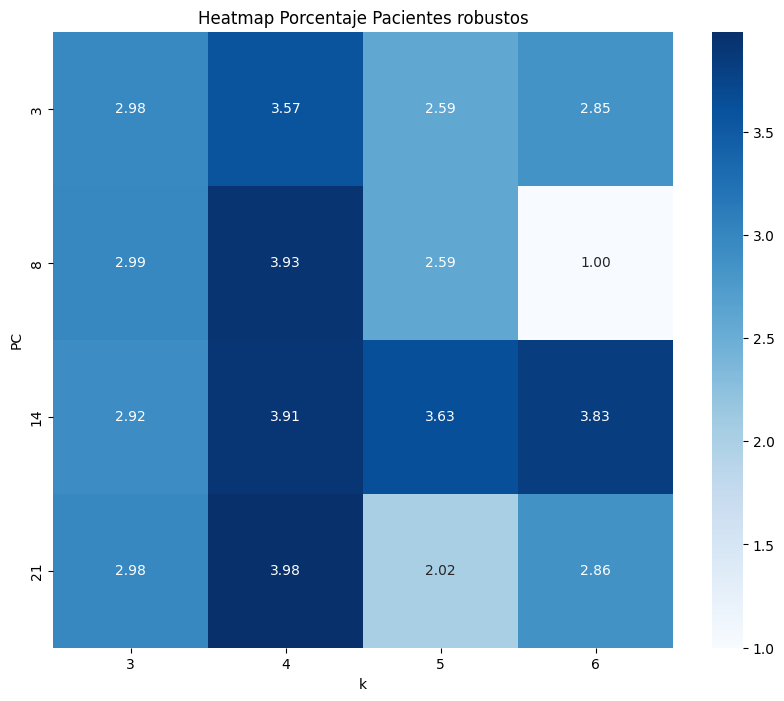

In [5]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import re  # Para expresiones regulares

# Lista para guardar los datos
data = []

# Recorre todos los archivos en el directorio actual
for filename in os.listdir():
    if filename.endswith('.csv'):
        # Extrae los valores de PC y k usando expresiones regulares
        match = re.search(r'PC(\d+)_k(\d+)', filename)
        if match:
            pc = int(match.group(1))
            k = int(match.group(2))
            
            df = pd.read_csv(filename)
            if 'Significativo' in df.columns:
                max_value = df['Porcentaje'].max()
                df['Frecuencia_Normalizada'] = df['Porcentaje'] / max_value
                total_normalized_frequency = df['Frecuencia_Normalizada'].sum()
                data.append({'PC': pc, 'k': k, 'Sum_Normalized_Frequency': total_normalized_frequency})
            else:
                print(f"La columna 'Porcentaje' no se encuentra en {filename}")

# Crea un DataFrame con los datos extraídos
heatmap_df = pd.DataFrame(data)

# Crea un pivote para el heatmap
pivot_table = heatmap_df.pivot(index="PC", columns="k", values="Sum_Normalized_Frequency")

# Ordena el DataFrame según los valores esperados de PC y k
pivot_table = pivot_table.reindex(index=[3, 8, 14, 21], columns=[3, 4, 5, 6])

# Dibuja el heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table, annot=True, cmap='Blues', fmt=".2f")
plt.title("Heatmap Porcentaje Pacientes robustos")
plt.xlabel("k")
plt.ylabel("PC")
plt.show()


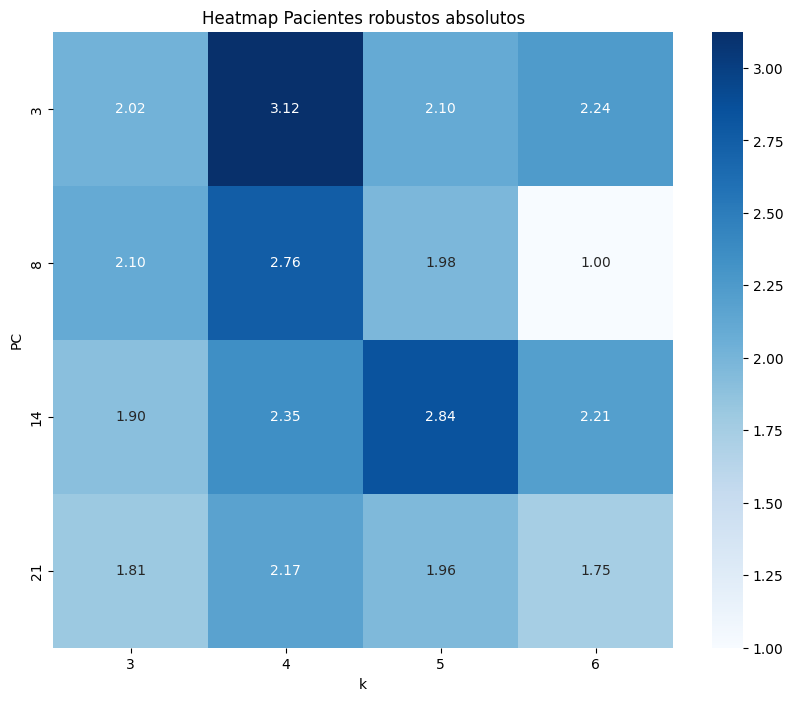

In [6]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import re  # Para expresiones regulares

# Lista para guardar los datos
data = []

# Recorre todos los archivos en el directorio actual
for filename in os.listdir():
    if filename.endswith('.csv'):
        # Extrae los valores de PC y k usando expresiones regulares
        match = re.search(r'PC(\d+)_k(\d+)', filename)
        if match:
            pc = int(match.group(1))
            k = int(match.group(2))
            
            df = pd.read_csv(filename)
            if 'Significativo' in df.columns:
                max_value = df['Significativo'].max()
                df['Frecuencia_Normalizada'] = df['Significativo'] / max_value
                total_normalized_frequency = df['Frecuencia_Normalizada'].sum()
                data.append({'PC': pc, 'k': k, 'Sum_Normalized_Frequency': total_normalized_frequency})
            else:
                print(f"La columna 'Significativo' no se encuentra en {filename}")

# Crea un DataFrame con los datos extraídos
heatmap_df = pd.DataFrame(data)

# Crea un pivote para el heatmap
pivot_table = heatmap_df.pivot(index="PC", columns="k", values="Sum_Normalized_Frequency")

# Ordena el DataFrame según los valores esperados de PC y k
pivot_table = pivot_table.reindex(index=[3, 8, 14, 21], columns=[3, 4, 5, 6])

# Dibuja el heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table, annot=True, cmap='Blues', fmt=".2f")
plt.title("Heatmap Pacientes robustos absolutos")
plt.xlabel("k")
plt.ylabel("PC")
plt.show()

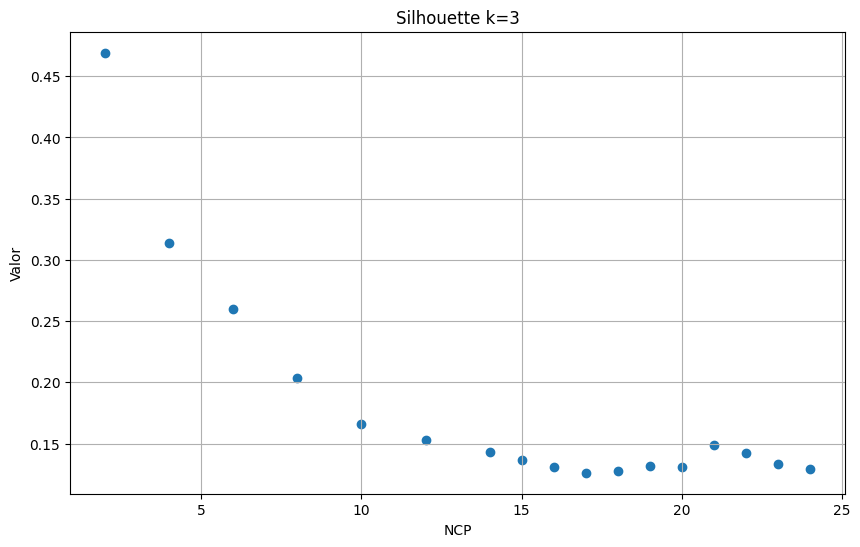

In [9]:
import matplotlib.pyplot as plt

# Valores proporcionados
ncp_values = [2, 4, 6, 8, 10, 12, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]
k3_values = [0.4691407, 0.3139821, 0.2600037, 0.2034528, 0.1663501, 0.1527102, 
             0.1431408, 0.1364112, 0.1309465, 0.1261774, 0.1279079, 0.1319214, 
             0.1309802, 0.1486322, 0.1423552, 0.1329264, 0.1289446]

# Crear el gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(ncp_values, k3_values, marker='o')

# Etiquetas y título
plt.xlabel('NCP')
plt.ylabel('Valor')
plt.title('Silhouette k=3')

# Mostrar el gráfico
plt.grid(True)
plt.show()



La columna 'Significativo' no se encuentra en df_final_PC14_k4.csv o k no es igual a 3
La columna 'Significativo' no se encuentra en df_final_PC14_k5.csv o k no es igual a 3
La columna 'Significativo' no se encuentra en df_final_PC14_k6.csv o k no es igual a 3
La columna 'Significativo' no se encuentra en df_final_PC21_k4.csv o k no es igual a 3
La columna 'Significativo' no se encuentra en df_final_PC21_k5.csv o k no es igual a 3
La columna 'Significativo' no se encuentra en df_final_PC21_k6.csv o k no es igual a 3
La columna 'Significativo' no se encuentra en df_final_PC3_k4.csv o k no es igual a 3
La columna 'Significativo' no se encuentra en df_final_PC3_k5.csv o k no es igual a 3
La columna 'Significativo' no se encuentra en df_final_PC3_k6.csv o k no es igual a 3
La columna 'Significativo' no se encuentra en df_final_PC8_k4.csv o k no es igual a 3
La columna 'Significativo' no se encuentra en df_final_PC8_k5.csv o k no es igual a 3
La columna 'Significativo' no se encuentra en df

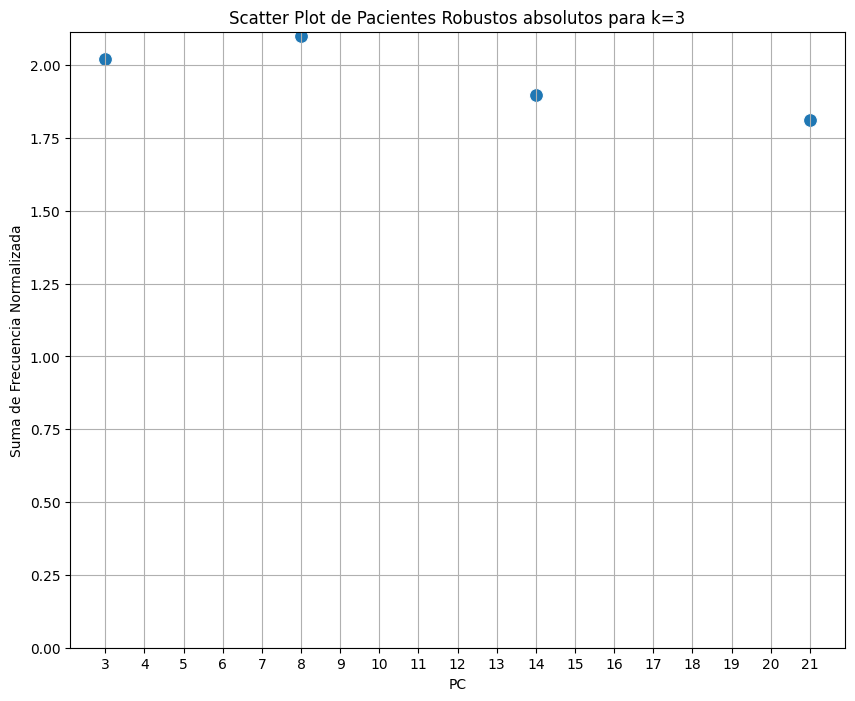

Media de la Suma de Frecuencia Normalizada: 1.9575611561853228


In [10]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import re  # Para expresiones regulares

# Lista para guardar los datos
data = []

# Recorre todos los archivos en el directorio actual
for filename in os.listdir():
    if filename.endswith('.csv'):
        # Extrae los valores de PC y k usando expresiones regulares
        match = re.search(r'PC(\d+)_k(\d+)', filename)
        if match:
            pc = int(match.group(1))
            k = int(match.group(2))
            
            df = pd.read_csv(filename)
            if 'Significativo' in df.columns and k == 3:
                max_value = df['Significativo'].max()
                df['Frecuencia_Normalizada'] = df['Significativo'] / max_value
                total_normalized_frequency = df['Frecuencia_Normalizada'].sum()
                data.append({'PC': pc, 'k': k, 'Sum_Normalized_Frequency': total_normalized_frequency})
            else:
                print(f"La columna 'Significativo' no se encuentra en {filename} o k no es igual a 3")

# Crea un DataFrame con los datos extraídos
scatter_df = pd.DataFrame(data)

# Dibuja el scatter plot solo para k=3
plt.figure(figsize=(10, 8))
sns.scatterplot(data=scatter_df, x='PC', y='Sum_Normalized_Frequency', s=100)
plt.xticks(range(min(scatter_df['PC']), max(scatter_df['PC'])+1))  # Ajusta los ticks del eje x a valores enteros
plt.title("Scatter Plot de Pacientes Robustos absolutos para k=3")
plt.xlabel("PC")
plt.ylabel("Suma de Frecuencia Normalizada")
plt.grid(True)
plt.ylim(0)  # Establece el límite inferior del eje y en 0
plt.show()

# Calcula la media de la columna 'Sum_Normalized_Frequency'
mean_normalized_frequency = scatter_df['Sum_Normalized_Frequency'].mean()
print("Media de la Suma de Frecuencia Normalizada:", mean_normalized_frequency)



La columna 'Porcentaje' no se encuentra en df_final_PC14_k4.csv o k no es igual a 3
La columna 'Porcentaje' no se encuentra en df_final_PC14_k5.csv o k no es igual a 3
La columna 'Porcentaje' no se encuentra en df_final_PC14_k6.csv o k no es igual a 3
La columna 'Porcentaje' no se encuentra en df_final_PC21_k4.csv o k no es igual a 3
La columna 'Porcentaje' no se encuentra en df_final_PC21_k5.csv o k no es igual a 3
La columna 'Porcentaje' no se encuentra en df_final_PC21_k6.csv o k no es igual a 3
La columna 'Porcentaje' no se encuentra en df_final_PC3_k4.csv o k no es igual a 3
La columna 'Porcentaje' no se encuentra en df_final_PC3_k5.csv o k no es igual a 3
La columna 'Porcentaje' no se encuentra en df_final_PC3_k6.csv o k no es igual a 3
La columna 'Porcentaje' no se encuentra en df_final_PC8_k4.csv o k no es igual a 3
La columna 'Porcentaje' no se encuentra en df_final_PC8_k5.csv o k no es igual a 3
La columna 'Porcentaje' no se encuentra en df_final_PC8_k6.csv o k no es igual a 

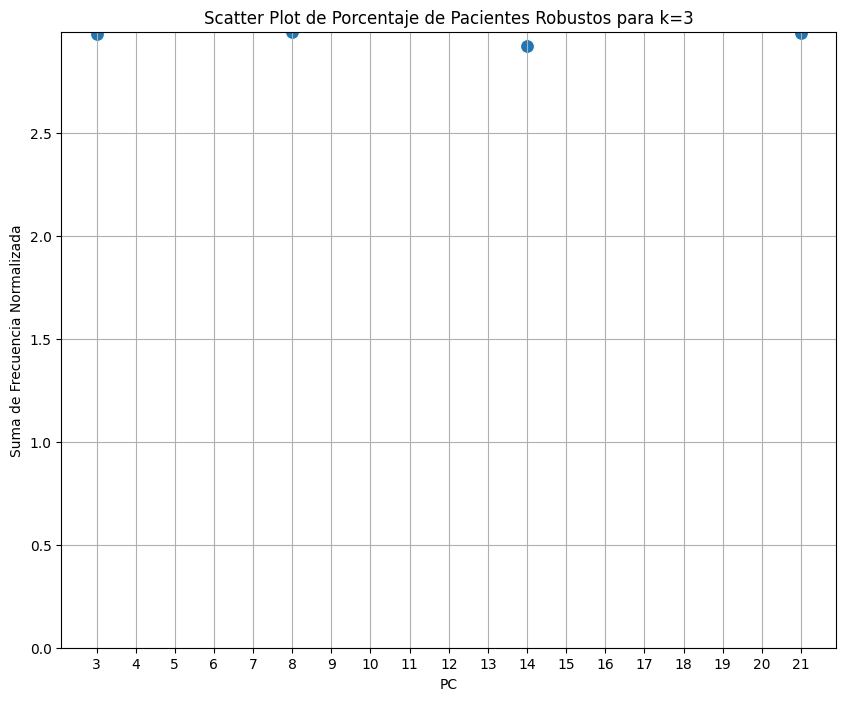

Media de la Suma de Frecuencia Normalizada: 2.9670460533281244


In [11]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import re  # Para expresiones regulares

# Lista para guardar los datos
data = []

# Recorre todos los archivos en el directorio actual
for filename in os.listdir():
    if filename.endswith('.csv'):
        # Extrae los valores de PC y k usando expresiones regulares
        match = re.search(r'PC(\d+)_k(\d+)', filename)
        if match:
            pc = int(match.group(1))
            k = int(match.group(2))
            
            df = pd.read_csv(filename)
            if 'Significativo' in df.columns and k == 3:
                max_value = df['Porcentaje'].max()
                df['Frecuencia_Normalizada'] = df['Porcentaje'] / max_value
                total_normalized_frequency = df['Frecuencia_Normalizada'].sum()
                data.append({'PC': pc, 'k': k, 'Sum_Normalized_Frequency': total_normalized_frequency})
            else:
                print(f"La columna 'Porcentaje' no se encuentra en {filename} o k no es igual a 3")

# Crea un DataFrame con los datos extraídos
scatter_df = pd.DataFrame(data)

# Dibuja el scatter plot solo para k=3
plt.figure(figsize=(10, 8))
sns.scatterplot(data=scatter_df, x='PC', y='Sum_Normalized_Frequency', s=100)
plt.xticks(range(min(scatter_df['PC']), max(scatter_df['PC'])+1))  # Ajusta los ticks del eje x a valores enteros
plt.title("Scatter Plot de Porcentaje de Pacientes Robustos para k=3")
plt.xlabel("PC")
plt.ylabel("Suma de Frecuencia Normalizada")
plt.grid(True)
plt.ylim(0)  # Establece el límite inferior del eje y en 0
plt.show()

# Calcula la media de la columna 'Sum_Normalized_Frequency'
mean_normalized_frequency = scatter_df['Sum_Normalized_Frequency'].mean()
print("Media de la Suma de Frecuencia Normalizada:", mean_normalized_frequency)



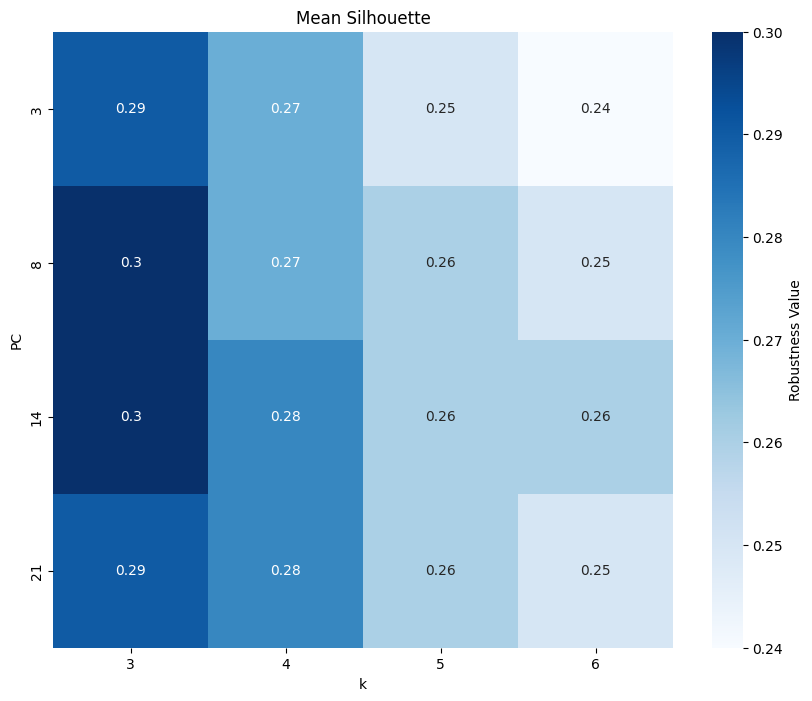

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Data for the heatmap (example values)
data = np.array([
    [0.29, 0.27, 0.25, 0.24],  # Example values for ncp=3
    [0.30, 0.27, 0.26, 0.25],  # Example values for ncp=8
    [0.30, 0.28, 0.26, 0.26],  # Example values for ncp=14
    [0.29, 0.28, 0.26, 0.25]   # Example values for ncp=21
])

# Row and column labels
rows = ['3', '8', '14', '21']
cols = ['3', '4', '5', '6']

# Create a DataFrame
df = pd.DataFrame(data, index=rows, columns=cols)

# Plotting the heatmap with updated color scheme
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(df, annot=True, cmap="Blues", cbar_kws={'label': 'Robustness Value'}, vmin=0.24, vmax=0.30)

# Add labels and title
plt.xlabel('k')
plt.ylabel('PC')
plt.title('Mean Silhouette')

# Show the plot
plt.show()



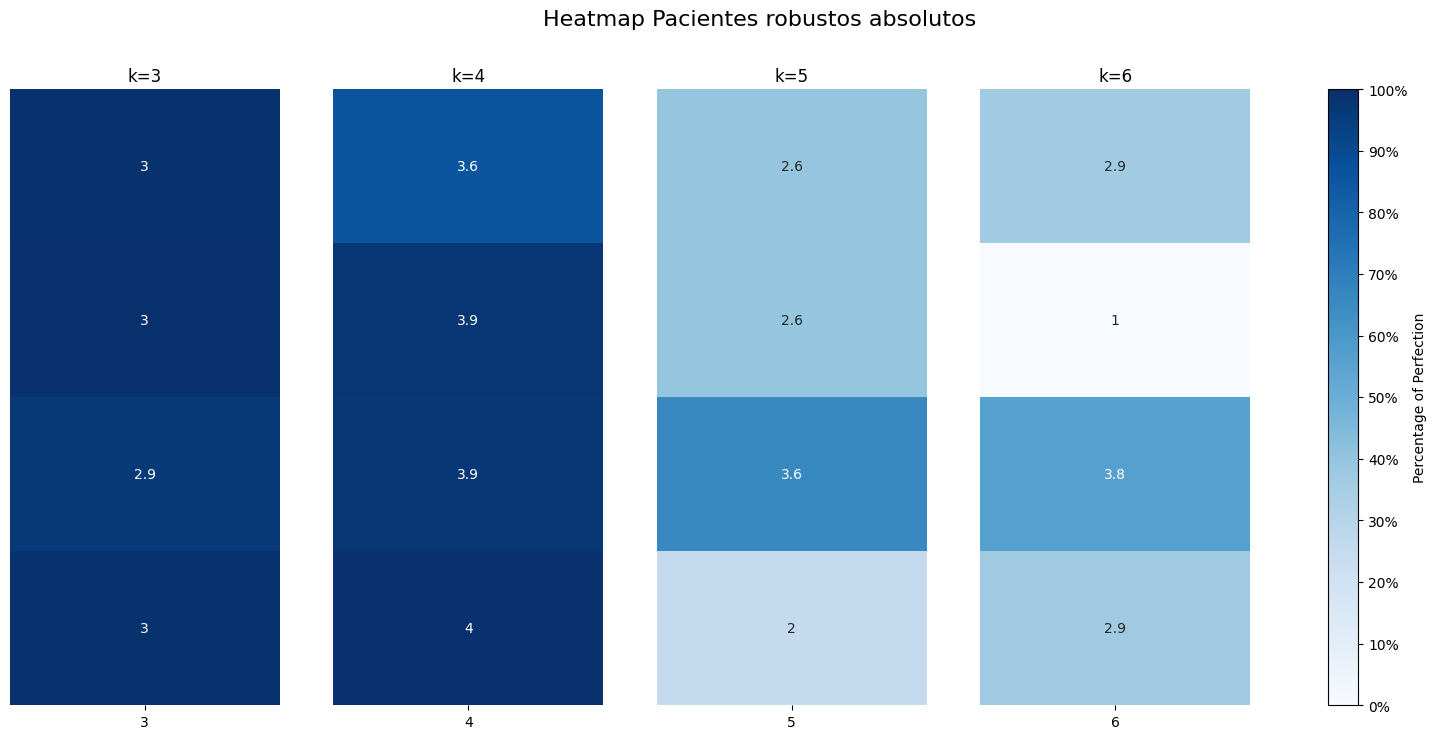

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from matplotlib.colors import LinearSegmentedColormap

# Data for the heatmap (example values)
data = np.array([
    [2.98, 3.57, 2.59, 2.85],  # Example values for ncp=3
    [2.99, 3.93, 2.59, 1],  # Example values for ncp=8
    [2.92, 3.91, 3.63, 3.83],  # Example values for ncp=14
    [2.98, 3.98, 2.02, 2.86]   # Example values for ncp=21
])

# Row and column labels
rows = ['3', '8', '14', '21']
cols = ['3', '4', '5', '6']

# Create a DataFrame
df = pd.DataFrame(data, index=rows, columns=cols)

# Function to normalize each column separately
def normalize_column(data, col_index, k_value):
    return (data[:, col_index] - 1) / (k_value - 1)

# Normalize data for each column separately
norm_data = np.zeros_like(data)
for i, k in enumerate([3, 4, 5, 6]):
    norm_data[:, i] = normalize_column(data, i, k)

# Plotting the heatmap with different gradients for each column
fig, axes = plt.subplots(1, data.shape[1], figsize=(20, 8), sharey=True)

for i in range(data.shape[1]):
    sns.heatmap(df.iloc[:, [i]], annot=True, cmap="Blues", cbar=False, vmin=1, vmax=int(cols[i]), ax=axes[i], yticklabels=i==0, xticklabels=True)
    axes[i].set_title(f'k={cols[i]}')

# Add a colorbar with percentage labels
cbar = fig.colorbar(plt.cm.ScalarMappable(norm=plt.Normalize(0, 1), cmap='Blues'), ax=axes, orientation='vertical', label='Percentage of Perfection')
cbar.set_ticks(np.linspace(0, 1, num=11))
cbar.set_ticklabels([f'{int(x*100)}%' for x in np.linspace(0, 1, num=11)])

# Add labels and title
plt.suptitle('Heatmap Pacientes robustos absolutos', fontsize=16)
plt.show()
